







# Project: Investigate the TMDb Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Movies have entertained people all over the world for over a hundred years. With advanced technology, we can now capture data about previous trends, popularity of movies and predict future tendencies. Collecting and storing data helps us draw conclusions and make wise decisions. Consider these following questions. Does the amount spent on creating a movie have a predictable outcome?  Does the popularity of an actor or actress have an affect on the popularity of a movie, even when the movie is unsuccessful? 

This project will dive into similiar questions using data from the TMBD-movies dataset. This data set includes information for about 11,000 movies collected and stored in The Movie Database (TMDb). This project will also use the NumPy, Pandas, and Matplotlib from the Python libraries to assist in presenting clean data and visuals.

Questions I am posing are;
>#1 Does the amount of budget increase with the popularity of recent movies?

>#2 Is the budget associated with the amount a revenue generated by movies?

>#3 Does the amount of budget correlate to the vote average for recent movies?

In [86]:
# import statements for all of the packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Here I will load in data from the tmdb-movies dataset, check for cleanliness, and then trim and clean  the data for analysis. 
### General Properties

In [87]:
# Load data and print out a few lines. Perform operations to inspect data types 
#and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,tt1392190,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,tt2908446,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,tt2488496,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,tt2820852,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052


### Column Description
id - unique to each movie and does not affect other variables

imdb_id - unique to each movie and does not affect other variables

popularity - based on user interactions on the website

budget - amount of cost to produce each movie

revenue - amount of money generated after the movie is released

original_title -  name of the movie

cast - name of some actors and actresses who have a role in the movie and not a complete set

homepage - unique to each movie and does not affect other variables

director - name of directors for each movie

tagline - unique to each movie and does not affect other variables

keywords - unique to each movie and does not affect other variables

overview - unique to each movie and does not affect other variables

runtime - length of the movie

genres - category of the movie

production_companies - companies involved in the production of the movie

release_date - date the movie was released

vote_count - amount of votes the movies recieved from viewers

vote_average - average amount of voted the movies recieved from viewers

release_year - year the movie was released 

budjet_adj - amount the budget was adjusted

revenue_adj - amount the revenue was adjusted


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning for Duplicate/Extra/Blank Values and Data Types

In [88]:
#get an overview of data (count of row/columns/blanks/data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Here we see there the RangeIndex has 10866 rows and 21 columns. We also see the datatypes for each column.

In [89]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [90]:
df.describe()
#get an idea or summary of data set

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000,10866.00000
mean,66064.17743,0.64644,14625701.09415,39823319.79339,102.07086,217.38975,5.97492,2001.32266,17551039.82289,51364363.25325
std,92130.13656,1.00018,30913213.83144,117003486.58209,31.38141,575.61906,0.93514,12.81294,34306155.72284,144632485.03997
min,5.00000,0.00006,0.00000,0.00000,0.00000,10.00000,1.50000,1960.00000,0.00000,0.00000
25%,10596.25000,0.20758,0.00000,0.00000,90.00000,17.00000,5.40000,1995.00000,0.00000,0.00000
50%,20669.00000,0.38386,0.00000,0.00000,99.00000,38.00000,6.00000,2006.00000,0.00000,0.00000
75%,75610.00000,0.71382,15000000.00000,24000000.00000,111.00000,145.75000,6.60000,2011.00000,20853251.08440,33697095.71731
max,417859.00000,32.98576,425000000.00000,2781505847.00000,900.00000,9767.00000,9.20000,2015.00000,425000000.00000,2827123750.41189


The describe function above auto calculates several columns with maximum, minimum and mean data, among other calculations.

>### Addressing duplicate rows
>Let's check for duplicates. In this process, I will locate, remove, and confirm removal of duplicates.

In [91]:
sum(df.duplicated())
#find duplicates

1

In [92]:
df.drop_duplicates(inplace=True)
#drop duplicates

In [93]:
sum(df.duplicated())
#confirm there are 0 duplicates

0

>### Addressing extra columns
>I'd like my data set to focus on revenue, popularity, budget and vote average. This is 6 of 21 columns.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

There are 21 columns of information so I will start by dropping columns that I will not use for questions and conclusions in this project. Columns I will use are id, popularity, budget, revenue, vote_average, release_date, and release_year. 

In [95]:
df.drop(['imdb_id','homepage','original_title','director','genres','production_companies','vote_count', 'cast', 'tagline', 'keywords', 'overview', 'runtime', 'budget_adj', 'revenue_adj'], axis = 1, inplace=True)
#drop unnecessary columns

In [96]:
df.head()
#confirm correct columns were dropped

,id,popularity,budget,revenue,release_date,vote_average,release_year
0,135397,32.98576,150000000,1513528810,6/9/15,6.50000,2015
1,76341,28.41994,150000000,378436354,5/13/15,7.10000,2015
2,262500,13.11251,110000000,295238201,3/18/15,6.30000,2015
3,140607,11.17310,200000000,2068178225,12/15/15,7.50000,2015
4,168259,9.33501,190000000,1506249360,4/1/15,7.30000,2015


>### Addressing missing values
>Now that we parsed some of the data, I will address the missing values.

In [97]:
df.info()
# check for missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10865 non-null  int64  
 1   popularity    10865 non-null  float64
 2   budget        10865 non-null  int64  
 3   revenue       10865 non-null  int64  
 4   release_date  10865 non-null  object 
 5   vote_average  10865 non-null  float64
 6   release_year  10865 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 679.1+ KB


>There are no blank values to address once the columns were deleted. The index above shows 10865 rows, and each column has that exact amount under the non-null data. This is a good thing.

In [98]:
#I'm creating a built in function to easily call the budget mean
def budget_average():
    return(df['budget'].mean())

In [99]:
budget_average()

14624286.06433502

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned the data, we'll move on to exploration. Here we will compute statistics and create visualizations with the goal of addressing  research questions posed in the Introduction section. We will look at one variable at a time, and then follow it up by looking at relationships between variables.

###Let's begin with pulling histograms and scatterplots for the existing data

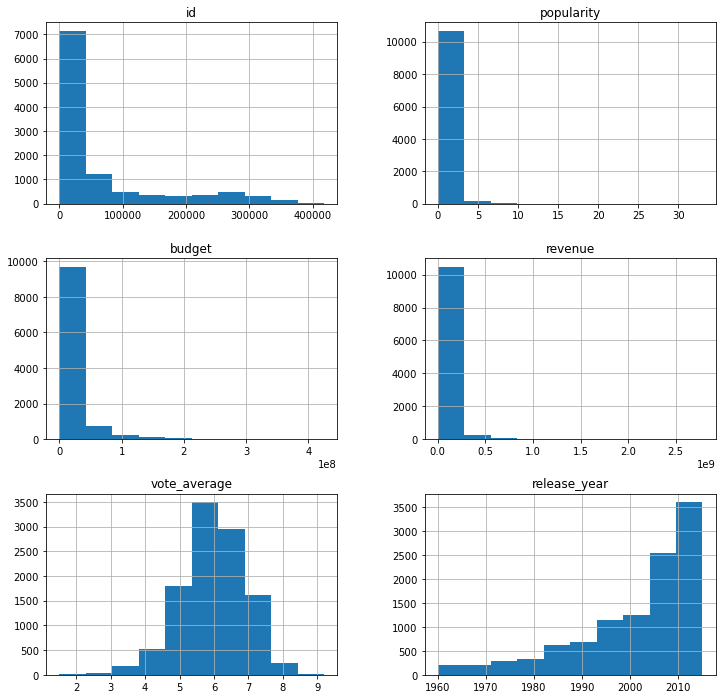

In [100]:
df.hist(figsize = (12,12));
#quick view of histograms

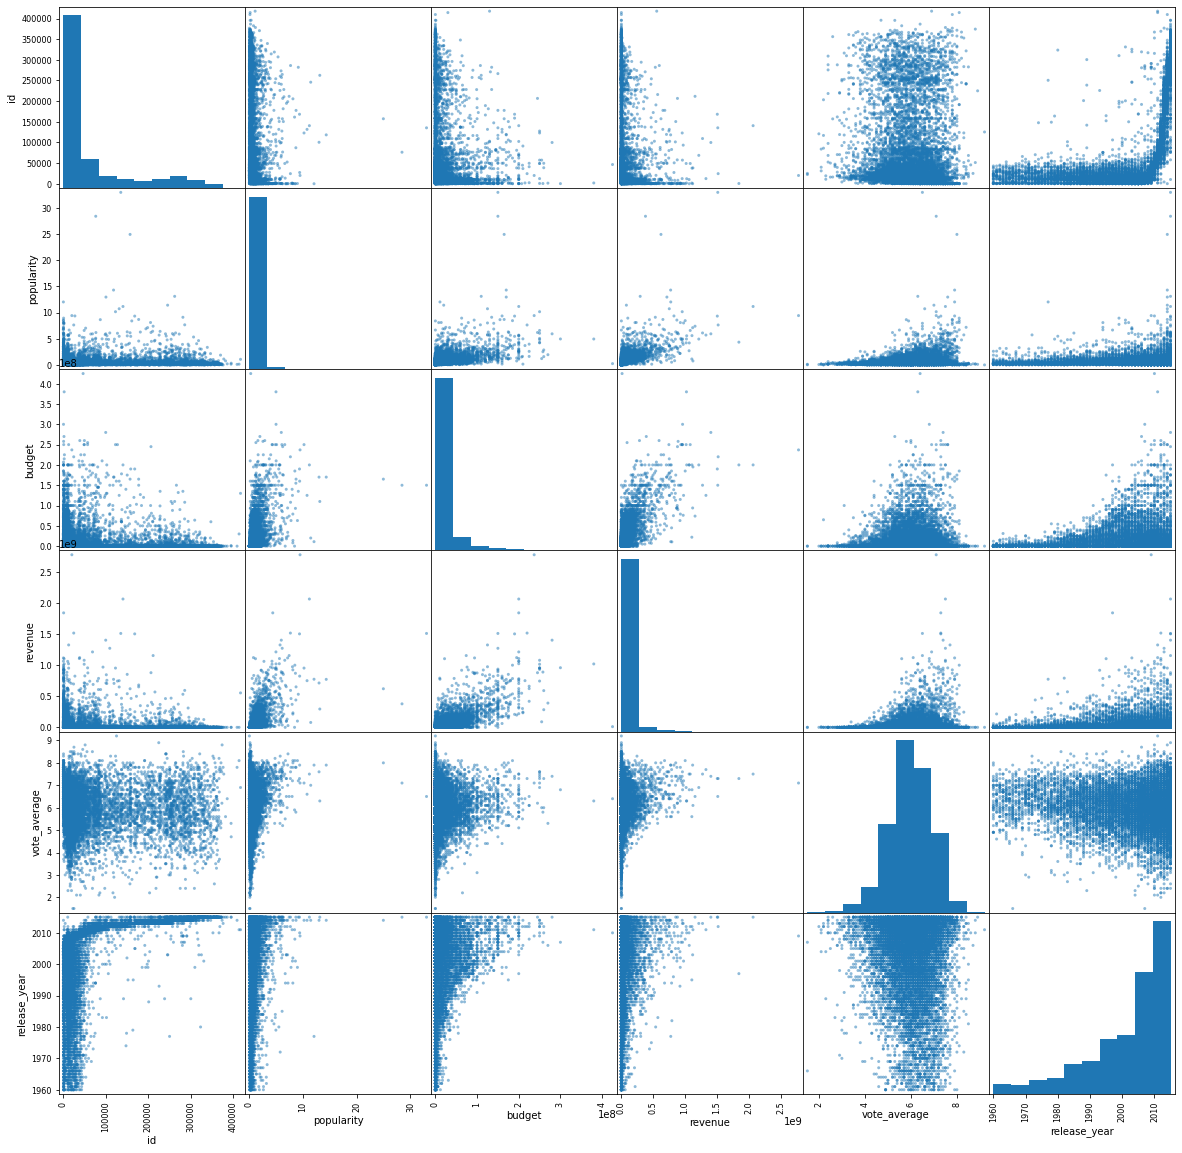

In [101]:
pd.plotting.scatter_matrix(df,figsize = (20,20));
#quick view of scatterplots

The histograms and scatterplots returned data that was difficult to translate into useful information.Let's take a close look at the ranges of years this dataset includes.

In [102]:
def movie_years ():
    df['release_year'].value_counts(ascending = [False])
    print(movie_years)

This explains why there is dense information in the visual charts. I decided to remove entries for any movie that was released prior to 2015. I chose this year since I wanted the last year of movie data for more focused and current results.

In [103]:
df.drop(df[(df['release_year'] < 2015)].index, inplace=True)

In [104]:
#confirm drop of prior years
df['release_year'].value_counts(ascending = [False])

2015    629
Name: release_year, dtype: int64

In [105]:
#This confirms few entries
#prior to the drop statement, there were 10,865 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            629 non-null    int64  
 1   popularity    629 non-null    float64
 2   budget        629 non-null    int64  
 3   revenue       629 non-null    int64  
 4   release_date  629 non-null    object 
 5   vote_average  629 non-null    float64
 6   release_year  629 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 39.3+ KB


In [106]:
df.groupby(['revenue']).mean()

,id,popularity,budget,vote_average,release_year
revenue,,,,,
0,315527.20581,0.35574,1030920.16707,5.71065,2015.00000
4444,333657.00000,0.29943,0.00000,6.30000,2015.00000
4505,347945.00000,0.42976,0.00000,5.30000,2015.00000
6075,248574.00000,0.88027,0.00000,5.50000,2015.00000
6921,283698.00000,0.17225,0.00000,6.20000,2015.00000
...,...,...,...,...,...
1156730962,211672.00000,7.40416,74000000.00000,6.50000,2015.00000
1405035767,99861.00000,5.94493,280000000.00000,7.40000,2015.00000
1506249360,168259.00000,9.33501,190000000.00000,7.30000,2015.00000


## Now lets pull the histograms again.

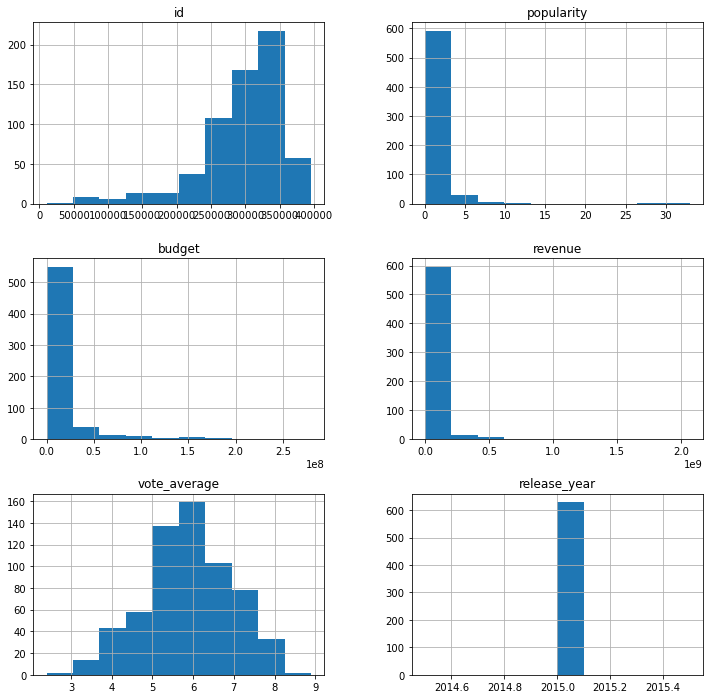

In [107]:
df.hist(figsize = (12,12));
#quick view of histograms

These visual are more focused and I'm confident they can aid in conlusions to posed questions.


### Research Question 1 - Does the popularity increase with the amount of budget for recent movies?
 
The movie budget inlcudes areas like movie rights, cast, directors, music, and visual effects. I wanted to explore if movies with higher budget tend to have a higher popularity with movie-goers. The analysis I performed in order to answer this question was comparing the populairty of movies in 2015 with the budget alloted for the same movies.
I compared 2015 movies and thier popularity to the budget alloted.

#### Budget to Popularity Scatterplot

<AxesSubplot:xlabel='popularity', ylabel='budget'>

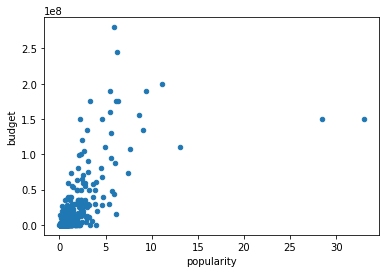

In [108]:
df.plot(x='popularity', y='budget', kind='scatter')

From this scatterplot above, the popularity of a movie does not closely relate to the budget of a movie. We can see up through the budget of $500,000 the popularity of the movie relatively low. 

#### Dataframe Description Chart with Scientific Notation Removed

In [109]:
#create df2 so we can drop scientfic notation in 2 columns for better comparison in descriptive dataframe

df2 = df.describe()
df2['budget']=df['budget'].describe().apply("{0:.0f}".format)
df2['revenue']=df['revenue'].describe().apply("{0:.0f}".format)
df2

,id,popularity,budget,revenue,vote_average,release_year
count,629.00000,629.00000,629,629,629.00000,629.00000
mean,296762.01272,1.03066,12077182,42547616,5.88569,2015.00000
std,58581.83794,2.23396,33184145,167799999,1.08728,0.00000
min,10317.00000,0.00392,0,0,2.40000,2015.00000
25%,271736.00000,0.20322,0,0,5.20000,2015.00000
50%,309887.00000,0.39447,0,0,5.90000,2015.00000
75%,334028.00000,0.95610,6000000,3286448,6.70000,2015.00000
max,395883.00000,32.98576,280000000,2068178225,8.90000,2015.00000


After analysing the scatterplot and data from df2, I did not conclusive find a correlation between the budget and populairy of the movies.

### Research Question 2 - Is the budget associated with the amount a revenue generated by movies?
For this question, I wanted to see if there was any relation between the amount of revenue and the movie budget. I wanted to find if there is a trend between the higher earning movies for revenue with the higher expense cost from the budget. This insight would be helpful for cast, directors, producer if there is a strong correlation. Meaning, If there is a connection after x amount of dollars spend to create a movie and place into production with the amount the movie will earn from the public who watch it. The analysis performed in order to answer this question is a scatter plot with a regression line. 

#### Budget to Revenue Scatterplot with Regression Line

correlation: (0.8007627509810185, 1.0902330074383665e-141)


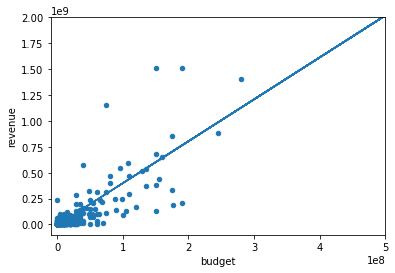

In [110]:
import statsmodels.api as stats
import scipy
#this is to show regression mode;
model = stats.OLS(df.revenue,stats.add_constant(df.budget))
p = model.fit().params
x =df.revenue
ax = df.plot(x='budget', y='revenue',kind='scatter')
#plotting regression line on the same axes, and setting x-axis limits
ax.plot(x,p.const + p.budget* x)
ax.set_xlim([-10000000,500000000])
ax.set_ylim([-100000000,2000000000])
print("correlation:",scipy.stats.pearsonr(df.budget,df.revenue))

The above scatterplot shows a scatterplot for the revenue and budget with a regression line. The trend for regressio is upward with a steady increase.

#### Budget to Revenue Bar Chart

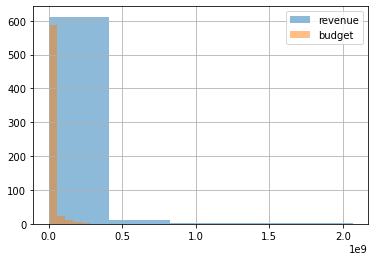

In [111]:
df.revenue.hist(alpha = 0.5,bins = 5, label = 'revenue')
df.budget.hist(alpha = 0.5,bins = 5, label = 'budget')
plt.legend();

The budget seems to correlate to the amount of revenue earned by each movie. Under $500,000 in revenue, the budget was relative up to the $600,000 mark. However, the revenue remained consistently high while lower producing movies were released.


### Research Question 3 - Does the amount of budget correlate to the vote average for recent movies?
For this question, I wanted to explore if a budget is high, would this equate to a higher vote for the movie. Again, the idea is to identify if there are patterns that can be identified which may help producers spend more money in the begining with the budget, prior to it's release. If there is a pattern, the pay off for the producer would be a larger return once the novie is release and popularity is recognized. I used a scatterplot and placed the vote average for every movie alongside the budget of each.

<AxesSubplot:xlabel='vote_average', ylabel='budget'>

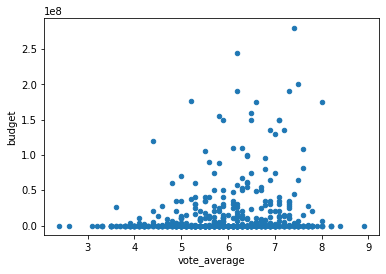

In [112]:
df.plot(x='vote_average', y='budget', kind='scatter')

In [113]:
df2

,id,popularity,budget,revenue,vote_average,release_year
count,629.00000,629.00000,629,629,629.00000,629.00000
mean,296762.01272,1.03066,12077182,42547616,5.88569,2015.00000
std,58581.83794,2.23396,33184145,167799999,1.08728,0.00000
min,10317.00000,0.00392,0,0,2.40000,2015.00000
25%,271736.00000,0.20322,0,0,5.20000,2015.00000
50%,309887.00000,0.39447,0,0,5.90000,2015.00000
75%,334028.00000,0.95610,6000000,3286448,6.70000,2015.00000
max,395883.00000,32.98576,280000000,2068178225,8.90000,2015.00000


In this scatterplot or datframe, the vote average does not correlate to the amount of budget.

<a id='conclusions'></a>
## Conclusion

To summarize my findings, I did not find that the budget had a strong correlation to the popularity or vote average for movies released in 2015. I did find a strong correlation for the budget amount and revenue generated by movies in 2015. Limitiations I came across are size in data. Many years of data was removed while keeping the last know year on record. As a result, a shorter period of time was examined.

Research Question 1 - Does the amount of budget increase with the popularity of recent movies? no

Answer: . The popularity of a movie does not closely relate to the budget of a movie. We can see up through the budget of $500,000 the popularity of the movie relatively low. Beyond this mark, the popularity is not predictable.

Question 2: Is the budget associated with the amount a revenue generated by movies?

Answer: The budget seems to correlate to the amount of revenue earned by each movie. Under $500,00 in revenue, the budget was relative up to the $600,000 mark. However, the revenue remained consistently high while lower producing movies were released.

Question 3: Does the amount of budget correlate to the vote average for recent movies?

Answer: The vote average does not seem to correlate to the amount of budget.

>### Analysis Shortcomings & Data Limitations
Here is the main limitaion I cam across. Much data was removed, 55 years to be exact. I kept the last known year of data on record. I chose the method so I can display concise results. A much shorter time period was examined. To better identify trends, the 2015 data set was acceptable. However, if I wanted to identify trends over different decades, the entire dataset would be best to analyze.  Therefore, these missing years might influence the results of my analysis. The analysis includes comparisons between budget, revenue, popularity and vote average.One shortcoming I found is that although I removed null values from my dataset, there were 0 values for some budgets which may contstrue results. There are rows of data with 0 entered in as budget. I did not confirm if the movie was made with 0 dollars or for free, or if the budget was unknown and therefore 0 was used as an entry.

In [114]:
#pull entries that contain zero in budget column
df3 = df.groupby ('budget').agg (lambda x: x.eq (0).sum ()) 
print (df3)


           id  popularity  revenue  release_date  vote_average  release_year
budget                                                                      
0           0           0      363             0             0             0
10          0           0        1             0             0             0
100000      0           0        0             0             0             0
447524      0           0        0             0             0             0
500000      0           0        1             0             0             0
...        ..         ...      ...           ...           ...           ...
176000003   0           0        0             0             0             0
190000000   0           0        0             0             0             0
200000000   0           0        0             0             0             0
245000000   0           0        0             0             0             0
280000000   0           0        0             0             0             0

<a id='conclusions'></a>
## Sources

> N/A